In [98]:
import pandas as pd
import numpy as np
import random
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances,manhattan_distances
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import time
from sklearn.manifold import TSNE

In [99]:
def clustering_md(train_arr, centroids):    
    ed_matrix = manhattan_distances(train_arr, centroids)
    nearest_centroid = []
    for i in range(ed_matrix.shape[0]):
        c = np.argmin(ed_matrix[i])
        nearest_centroid.append(c)
    return nearest_centroid

In [100]:
def clustering_eu(train_arr, centroids):    
    ed_matrix = euclidean_distances(train_arr, centroids)
    nearest_centroid = []
    for i in range(ed_matrix.shape[0]):
        c = np.argmin(ed_matrix[i])
        nearest_centroid.append(c)
    return nearest_centroid

In [101]:
def clustering_cos(train_arr, centroids):    
    ed_matrix = cosine_similarity(train_arr, centroids)
    nearest_centroid = []
    for i in range(ed_matrix.shape[0]):
        c = np.argmax(ed_matrix[i])
        nearest_centroid.append(c)
    return nearest_centroid

In [102]:
def calc_centroids(train_arr, nearest_centroid, centroids):
    cluster_d = list()
    all_cluster_d = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    new_centroids = list()
    new_df = pd.concat([pd.DataFrame(train_arr), pd.DataFrame(nearest_centroid, columns=['cluster'])], axis=1)    
    new_df_arr = np.array(new_df['cluster'])
    for c in set(new_df_arr):        
        thiscluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]        
        temp = np.array(centroids[c])
        temp = temp.reshape(1,-1)        
        cluster_d = manhattan_distances(thiscluster, temp)
        #cluster_d = euclidean_distances(thiscluster, temp)
        #cluster_d = cosine_similarity(thiscluster, temp)
        for d in cluster_d:
            all_cluster_d[c] += d * d        
        cluster_mean = thiscluster.mean(axis=0)        
        new_centroids.append(cluster_mean)    
    return new_centroids, all_cluster_d

In [103]:
def runner(k):
    tsne = TSNE(n_components = 2, perplexity = 50, init = 'pca', random_state=0)
    df = pd.read_csv("test_MNIST.txt", header=None)
    arr = np.array(df)
    arr = arr.astype(float)
    
    #normalization of data using minmax scaler
    scaler = MinMaxScaler()
    scaled_arr = scaler.fit_transform(arr)

    
    train_arr = tsne.fit_transform(scaled_arr)
    
    c_index = random.sample(range(0, len(train_arr)), k)    
    centroids = []
    
    for i in c_index:
        centroids.append(train_arr[i])
    centroids = np.array(centroids)    
    
    sse = []
    iterations = 50
    nearest_centroid = []
    for i in range(iterations):
        nearest_centroid = clustering_md(train_arr, centroids)
        #nearest_centroid = clustering_eu(train_arr, centroids)
        #nearest_centroid = clustering_cos(train_arr, centroids)
        centroids, all_cluster_d = calc_centroids(train_arr, nearest_centroid, centroids)
        sse.append(sum(all_cluster_d))                
    new_df = pd.concat([pd.DataFrame(train_arr), pd.DataFrame(nearest_centroid, columns=['cluster'])], axis=1)
    new_df.replace({0:1, 1:2,2:3,3:4,4:5,5:6,6:7,7:8,8:9,9:10}, inplace=True)
    new_df.to_csv('MNIST_result_euclid_pca_perplex50.csv',columns=['cluster'], index =False, header = False)
    
    plt.figure()
    plt.plot(range(iterations), sse, 'bx-')
    plt.xlabel('iterations')
    plt.ylabel('SSE')
    plt.title('The Elbow Method showing the optimal iterations')
    plt.show()

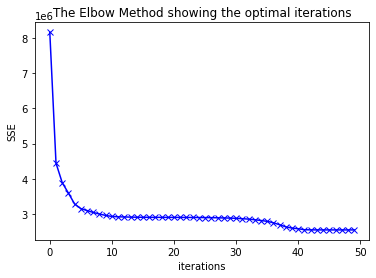

Execution time =  218.0694100856781


In [104]:
start = time.time()
runner(10)
print("Execution time = ", time.time() - start)